**COLLECTE DE DONNÉES** 💻

In [ ]:
!pip install webcolors

In [ ]:
! pip3 install graphviz pydotplus

In [ ]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import json
import random as rd
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import math
from sklearn.cluster import MiniBatchKMeans
import glob 
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES, 
    hex_to_rgb,
)
import matplotlib.pyplot as plot
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


On a un dataset de 370 fleurs, accompagnés d'un document .csv contenant 10 colonnes de criteres




In [ ]:
#getting the data in csv format
csv_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/train.csv')
csv_data.drop_duplicates(subset ="filename", keep ='first', inplace=True)
csv_data.head(20)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cats_001.jpg,474,266,cat,132,1,347,264
1,cats_002.jpg,474,474,cat,176,44,467,433
2,cats_003.jpg,474,314,cat,53,1,397,314
3,cats_004.jpg,474,355,cat,1,1,393,335
4,cats_005.jpg,474,316,cat,80,1,407,316
5,cats_006.jpg,474,266,cat,177,21,345,243
6,cats_008.jpg,474,355,cat,63,1,417,355
7,cats_009.jpg,474,343,cat,1,1,380,342
8,cats_010.jpg,474,266,cat,1,1,383,266
9,cats_011.jpg,474,266,cat,12,1,444,260


In [ ]:
#conversion from csv to JSON
csv_data.to_json("/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/train.json", orient = "records")
json_data = json.load(open('/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/train.json'))
dataframe = pd.json_normalize(json_data)
print(dataframe)

                  filename  width  height   class  xmin  ymin  xmax  ymax
0             cats_001.jpg    474     266     cat   132     1   347   264
1             cats_002.jpg    474     474     cat   176    44   467   433
2             cats_003.jpg    474     314     cat    53     1   397   314
3             cats_004.jpg    474     355     cat     1     1   393   335
4             cats_005.jpg    474     316     cat    80     1   407   316
..                     ...    ...     ...     ...   ...   ...   ...   ...
464  monkey_groups_084.jpg    474     315  monkey    52   132   107   297
465  monkey_groups_093.jpg    474     322  monkey     1   234   104   322
466  monkey_groups_095.jpg    474     300  monkey    46    18   130   201
467  monkey_groups_097.jpg    474     316  monkey    23   109   141   296
468  monkey_groups_099.jpg    474     266  monkey    18     9   302   266

[469 rows x 8 columns]


**Transformation 🖱**

In [ ]:
print(type(dataframe["xmin"]))
a = 5
print(type(a))
print(type(dataframe["width"]*0.3))
print(type(dataframe["xmax"] - dataframe["xmin"]))
print(max(dataframe["width"]))

<class 'pandas.core.series.Series'>
<class 'int'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
474


In [ ]:
#creating 2 new dataframe columns containing the size of the object according the the bounding box coordinates (x and y)
dataframe['tailleX'] = dataframe['xmax'] - dataframe['xmin']
dataframe['tailleY'] = dataframe['ymax'] - dataframe['ymin']

#width of bounding box: 0 = small; 1 = medium; 2 = large
dataframe.loc[dataframe['tailleX'] < dataframe['width']*0.3 , 'tailleX'] = 0
dataframe.loc[(dataframe['tailleX'] >= dataframe['width']*0.3) & (dataframe['tailleX'] <= dataframe['width']*0.7), 'tailleX'] = 1
dataframe.loc[dataframe['tailleX'] > dataframe['width']*0.7 , 'tailleX'] = 2

#height of bounding box: 0 = small; 1 = medium; 2 = large
dataframe.loc[dataframe['tailleY'] < dataframe['height']*0.3 , 'tailleY'] = 0
dataframe.loc[(dataframe['tailleY'] >= dataframe['height']*0.3) & (dataframe['tailleX'] <= dataframe['height']*0.7), 'tailleY'] = 1
dataframe.loc[dataframe['tailleY'] > dataframe['height']*0.7 , 'tailleY'] = 2

#width
a = max(dataframe["width"])
dataframe.loc[dataframe['width'] < a*0.3 , 'width'] = 0
dataframe.loc[(dataframe['width'] >= a*0.3) & (dataframe['width'] <= a*0.7), 'width'] = 1
dataframe.loc[dataframe['width'] > a*0.7 , 'width'] = 2

#height
b = max(dataframe["height"])
dataframe.loc[dataframe['height'] < b*0.3 , 'height'] = 0
dataframe.loc[(dataframe['height'] >= b*0.3) & (dataframe['height'] <= b*0.7), 'height'] = 1
dataframe.loc[dataframe['height'] > b*0.7 , 'height'] = 2

In [ ]:
print(type(dataframe))
dataframe.drop(columns = ["filename","xmin", "ymin", "xmax", "ymax"], inplace=True)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#creating an empty list
like = []

for i in range (len(dataframe)):
  #appending either 0 or 1 to the list
  int = rd.randint(0,1)
  if (int == 1):
    like.append("favorite")
  else:
    like.append("not favorite")

resultframe = pd.DataFrame(like, columns=["likes"])
dataframe['likes'] = like  
print(resultframe)


            likes
0        favorite
1    not favorite
2        favorite
3    not favorite
4        favorite
..            ...
464  not favorite
465  not favorite
466  not favorite
467  not favorite
468      favorite

[469 rows x 1 columns]


**Etiquetage et annotation 📔**

Couleurs prédominantes

In [ ]:
#Permet de retourner le nom de la couleur en fonction des valeurs RGB
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []    
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)    
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]


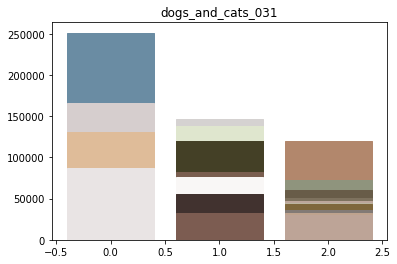

In [ ]:
cluster_count = 3
couleur_dom_1 = []
couleur_dom_2 = []
couleur_dom_3 = []

for  f in glob.glob('/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/yolo-animal-detection-small/train/*.jpg'):
    imgfile = Image.open(f)
    numarray = np.array(imgfile.getdata(), np.uint8)
    clusters = MiniBatchKMeans(n_clusters = cluster_count)
    clusters.fit(numarray)
    npbins = np.arange(0,cluster_count + 1)
    histogram = np.histogram(clusters.labels_, bins=npbins)
    histogram2=sorted(histogram[0],reverse=True)
    labels = np.unique(clusters.labels_)
    barlist = plot.bar(labels, histogram2)

    nom_couleur = []
    
    for i in range(cluster_count):
              couleur = ("#%02x%02x%02x"
              % (
                  math.ceil(clusters.cluster_centers_[i][0]),
                  math.ceil(clusters.cluster_centers_[i][1]),
                  math.ceil(clusters.cluster_centers_[i][2]),
              )
              )
              barlist[i].set_color(couleur)

    couleur_rgb = hex_to_rgb(couleur)
    nom_couleur.append(convert_rgb_to_names(couleur_rgb))
    
    couleur_dom_1.append(nom_couleur[0])
    """couleur_dom_2.append(nom_couleur[1])
    couleur_dom_3.append(nom_couleur[2])"""

    plot.title(f.split('/')[-1].split('.')[0])
    #plot.show()

    #print(f, nom_couleur)
    #print(couleur_dom_1)
    

In [ ]:
dataframe['couleur1']= couleur_dom_1
print(len(couleur_dom_1))
print (dataframe)

469
     width  height   class  tailleX  tailleY         likes       couleur1
0        2       1     cat        1        1      favorite         silver
1        2       1     cat        1        1  not favorite  darkslategray
2        2       1     cat        2        1      favorite        dimgray
3        2       1     cat        2        1  not favorite           gray
4        2       1     cat        1        1      favorite  darkslategray
..     ...     ...     ...      ...      ...           ...            ...
464      2       1  monkey        0        1  not favorite         maroon
465      2       1  monkey        0        0  not favorite         sienna
466      2       1  monkey        0        1  not favorite           gray
467      2       1  monkey        0        1  not favorite      rosybrown
468      2       1  monkey        1        1      favorite      rosybrown

[469 rows x 7 columns]


In [ ]:
# generating numerical labels
le1 = LabelEncoder()
dataframe["width"] = le1.fit_transform(dataframe["width"])
#print("width\n",dataframe['width'])

le2 = LabelEncoder()
dataframe["height"] = le2.fit_transform(dataframe["height"])
#print("height\n",dataframe['height'])

le3 = LabelEncoder()
dataframe["class"] = le3.fit_transform(dataframe["class"])
#print("class\n",dataframe['class'])

le4 = LabelEncoder()
dataframe["tailleX"] = le4.fit_transform(dataframe["tailleX"])
#print("tailleX\n",dataframe['tailleX'])

le5 = LabelEncoder()
dataframe["tailleY"] = le5.fit_transform(dataframe["tailleY"])
#print("tailleY\n",dataframe['tailleY'])

le7 = LabelEncoder()
dataframe["couleur1"] = le7.fit_transform(dataframe["couleur1"])

le6 = LabelEncoder()
resultframe["likes"] = le6.fit_transform(resultframe["likes"])

print(dataframe)

     width  height  class  tailleX  tailleY         likes  couleur1
0        1       1      0        1        1      favorite        28
1        1       1      0        1        1  not favorite        10
2        1       1      0        2        1      favorite        11
3        1       1      0        2        1  not favorite        13
4        1       1      0        1        1      favorite        10
..     ...     ...    ...      ...      ...           ...       ...
464      1       1      2        0        1  not favorite        20
465      1       1      2        0        0  not favorite        27
466      1       1      2        0        1  not favorite        13
467      1       1      2        0        1  not favorite        25
468      1       1      2        1        1      favorite        25

[469 rows x 7 columns]


**Analyse de données 💽**

In [ ]:
dataframe_user = pd.DataFrame()

"""for i in range(len(dataframe)):
  if dataframe.loc[i,"likes"] == 1:
    dataframe_user.loc[i, "width"] = dataframe.loc[i,"width"]
    dataframe_user.loc[i, "height"] = dataframe.loc[i,"height"]
    dataframe_user.loc[i, "class"] = dataframe.loc[i,"class"]
    dataframe_user.loc[i, "tailleX"] = dataframe.loc[i,"tailleX"]
    dataframe_user.loc[i, "tailleY"] = dataframe.loc[i,"tailleY"]
    dataframe_user.loc[i, "couleur1"] = dataframe.loc[i,"couleur1"]"""

dataframe_user = dataframe.loc[dataframe['likes'] == "favorite"]
#dataframe_user = dataframe.iloc[np.where(dataframe['likes'] == "favorite")[0], :]


print(dataframe_user)


     width  height  class  tailleX  tailleY     likes  couleur1
0        1       1      0        1        1  favorite        28
2        1       1      0        2        1  favorite        11
4        1       1      0        1        1  favorite        10
7        1       1      0        2        1  favorite         7
8        1       1      0        2        1  favorite         7
..     ...     ...    ...      ...      ...       ...       ...
456      1       1      2        0        1  favorite        13
458      1       1      2        0        1  favorite         3
460      1       1      2        0        1  favorite         5
462      1       1      2        1        1  favorite        18
468      1       1      2        1        1  favorite        25

[250 rows x 7 columns]


**Visualisation des données 🖥** 

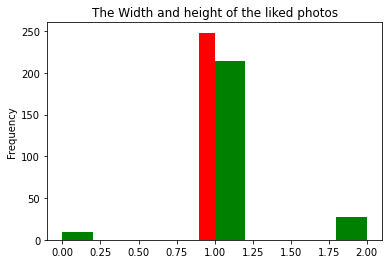

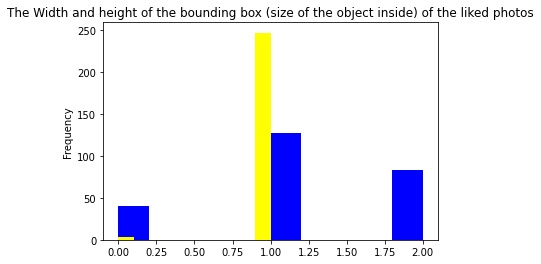

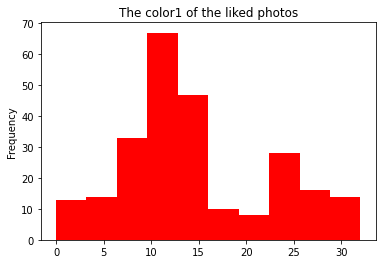

In [ ]:
labels = ["small", "medium", "large"]

dataframe_user["width"].plot.hist(color='red')

dataframe_user["height"].plot.hist(color='green')
plot.title("The Width and height of the liked photos")
plot.show()

dataframe_user["tailleX"].plot.hist(color='blue')

dataframe_user["tailleY"].plot.hist(color='yellow')
plot.title("The Width and height of the bounding box (size of the object inside) of the liked photos")
plot.show()

dataframe_user["couleur1"].plot.hist(color='red')
plot.title("The color1 of the liked photos")
plot.show()

**Système de recommandation 🖱** 

In [ ]:
del dataframe["likes"]
print(dataframe)

     width  height  class  tailleX  tailleY  couleur1
0        1       1      0        1        1        28
1        1       1      0        1        1        10
2        1       1      0        2        1        11
3        1       1      0        2        1        13
4        1       1      0        1        1        10
..     ...     ...    ...      ...      ...       ...
464      1       1      2        0        1        20
465      1       1      2        0        0        27
466      1       1      2        0        1        13
467      1       1      2        0        1        25
468      1       1      2        1        1        25

[469 rows x 6 columns]


In [ ]:
import graphviz
import pydotplus
from IPython.display import Image, display

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

dot_data = tree.export_graphviz(dtc, out_file=None,
      feature_names=dataframe.columns,
      filled=True, rounded=True, 
      class_names =
      le6.inverse_transform(
        resultframe.likes.unique())
      ) 
graph = graphviz.Source(dot_data) 
  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)


Output hidden; open in https://colab.research.google.com to view.

**TEST ✅**

In [ ]:
csv_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/test.csv')
csv_data.drop_duplicates(subset ="filename", keep ='first', inplace=True)

csv_data.to_json("/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/test.json", orient = "records")
json_data = json.load(open('/content/drive/MyDrive/Colab_Notebooks/PROJET/animals/test.json'))

test_df = pd.json_normalize(json_data)

test_df['tailleX'] = test_df['xmax'] - test_df['xmin']
test_df['tailleY'] = test_df['ymax'] - test_df['ymin']

print(test_df)
#dtc.predict(test_df)

                    filename  width  height   class  xmin  ymin  xmax  ymax  \
0               cats_000.jpg    474     632     cat   103    72   436   603   
1               cats_007.jpg    474     266     cat   301    37   460   265   
2               cats_050.jpg    474     237     cat   157    40   314   205   
3               cats_072.jpg    474     266     cat   187     1   474   266   
4               cats_076.jpg    474     474     cat    12     6   244   462   
5               cats_079.jpg    474     266     cat    78     1   474   266   
6               cats_088.jpg    474     266     cat   129     1   385   266   
7               cats_091.jpg    474     316     cat   156    13   328   316   
8               cats_099.jpg    474     237     cat   226     1   395   237   
9               cats_100.jpg    474     266     cat    40     1   420   266   
10  cats_and_monkeys_000.jpg    474     674     cat    47   207   465   616   
11  cats_and_monkeys_002.jpg    474     710  monkey 